## Спрос на рейсы авиакомпании

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from scipy import stats as st

warnings.filterwarnings('ignore')

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [4]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


In [5]:
query_1.describe()

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [6]:
query_3.describe()

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [7]:
query_1.head()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300


In [8]:
query_3.head()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


In [9]:
# Создадим датафрейм с топ-10 городов по количеству рейсов
top_10_city = query_3.sort_values(by = 'average_flights', ascending = False).head(10)
top_10_city

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [10]:
display(query_1.isna().mean())
display(query_3.isna().mean())
top_10_city.isna().mean()

model             0.0
flights_amount    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

city               0.0
average_flights    0.0
dtype: float64

Пропуски в данных отсутствуют. Данные повторяют результаты запросов из SQL в необходимом формате. 

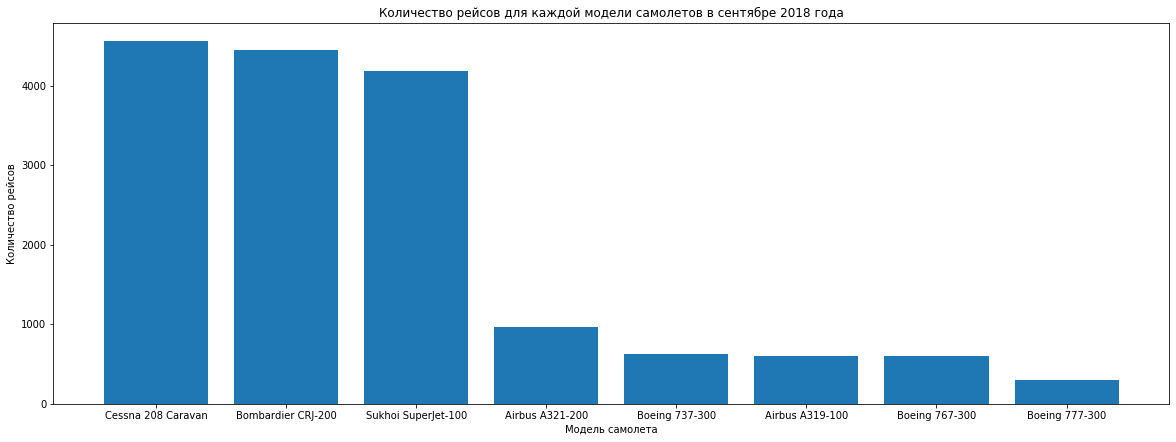

In [12]:
query_1 = query_1.sort_values(by='flights_amount', ascending = False)
plt.figure(figsize = (20,7))
plt.bar(query_1.model, query_1.flights_amount)
plt.title('Количество рейсов для каждой модели самолетов в сентябре 2018 года')
plt.ylabel('Количество рейсов')
plt.xlabel('Модель самолета')
plt.show()

In [ ]:
#plt.figure(figsize=[15, 10])
#plt.plot(query_1['model'], query_1['flights_amount'])
#plt.xlabel("Модель самолета")
#plt.ylabel("Количество рейсов")
#plt.grid(b = True)
#plt.xticks(rotation = 45)
#plt.yticks(list(range(0, query_1['flights_amount'].max()+250, 250)))
#plt.title("Количество рейсов для каждой модели самолетов в сентябре 2018 года")
#plt.show()

На данном графике можно наблюдать зависимость:

Для моделей Cessna, Bombardier и Sukhoi Superjet наблюдается максимальное количество рейсов по сравнению с другими моделями, по причине расстояния - из-за дальности перелета. Эти самолеты имеют среднюю дальность в 2000 км, чем популярен в западной части Россиии, где находится много городов , которые расположены близко друг к другу. 

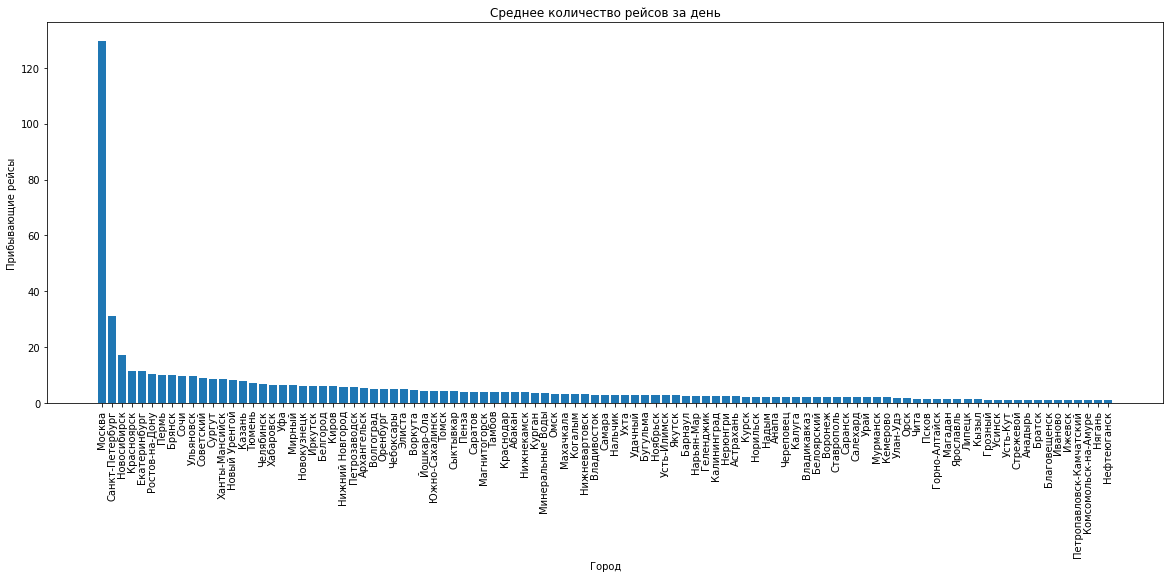

In [13]:
query_3_sorted = query_3.sort_values(by = 'average_flights', ascending = False)
plt.figure(figsize = (20,7))
plt.bar(query_3_sorted.city, query_3_sorted.average_flights)
plt.title('Среднее количество рейсов за день')
plt.ylabel('Прибывающие рейсы')
plt.xlabel('Город')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
#plt.figure(figsize = [15, 10])
#plt.plot(query_3['city'], query_3['average_flights'])
#plt.xlabel("Город")
#plt.ylabel("Среднее количество рейсов за день")
#plt.grid(b = True)
#plt.xticks(rotation = 90)
#plt.yticks(list(range(0, int(query_3['average_flights'].max()+10), 10)))
#plt.title("Среднее количество рейсов, прибывающих в город за день в сентябре 2018 года")
#plt.show()

На графике "Среднее количество рейсов" можно наблюдать следующуя зависимость:

Здесь уже популярными городами являются Москва, Санкт-Петербург и Новосибирск, по причине того, что они являются важными воздушнотранспортными узлами, где можно осущесвить пересадку на международный рейс или использовать кактранзит. Также их популярность связанна с тем, сколько аэропортов имеет каждый город.

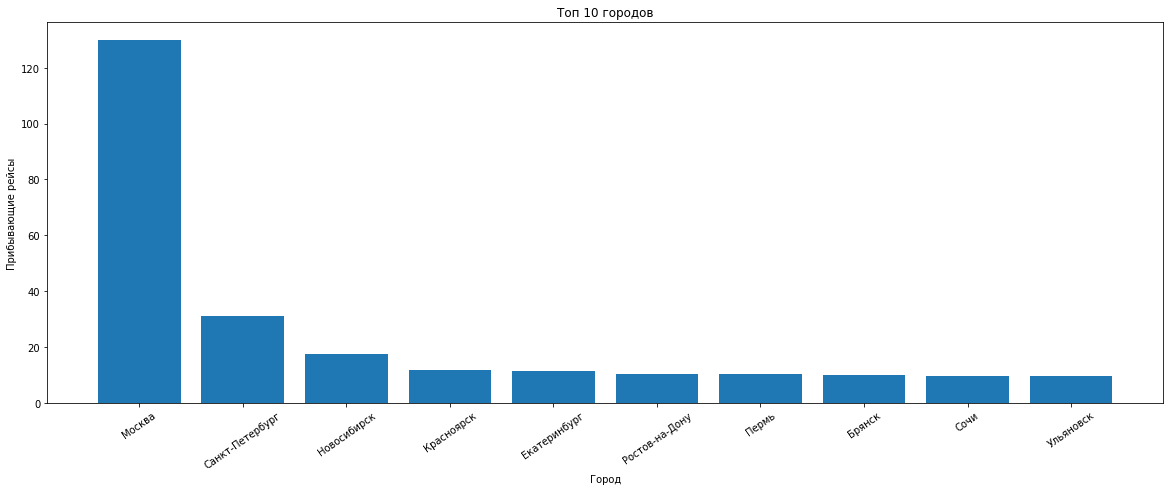

In [14]:
query_3_top10 = query_3.sort_values(by = 'average_flights', ascending = False)[:10]
plt.figure(figsize = (20,7))
plt.bar(query_3_top10.city, query_3_top10.average_flights)
plt.title('Топ 10 городов')
plt.ylabel('Прибывающие рейсы')
plt.xlabel('Город')
plt.xticks(rotation = 35)
plt.show()

In [ ]:
#plt.figure(figsize = [15, 10])
#plt.plot(top_10_city['city'], top_10_city['average_flights'])
#plt.xlabel("Город")
#plt.ylabel("Среднее количество рейсов за день")
#plt.grid(b = True)
#plt.xticks(rotation = 45)
#plt.yticks(list(range(0, int(top_10_city['average_flights'].max()+10), 10)))
#plt.title("Топ-10 городов по количеству рейсов, прибывающих в город за день в сентябре 2018 года")
#plt.show()

На графике выше наблюдаем следующая зависимость:

Москва занимает первое место , так как там самое большое количество аэропортов, ьольше чем у остальных городов.

И то, что уже отмечалось - Москва, Санкт-Петербург, Новосибирск являются важными воздушними узлами для международных перелетов. Большинство перелетов в этих городах происходят из-за пересадки на другой рейс для полета за границу.

### Вывод по шагу 1

Библиотеки импортированы, данные корректно сформированы в запросы и проведен анализ данных с графическим отображением.

## Проверка гипотезы

In [15]:
query_last = pd.read_csv('/datasets/query_last.csv')
query_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 448.0+ bytes


In [16]:
query_last.describe()

,week_number,ticket_amount,festival_week
count,10.00000,10.000000,3.000000
mean,34.50000,50670.400000,32.333333
std,3.02765,2502.752716,3.214550
min,30.00000,43568.000000,30.000000
25%,32.25000,51364.500000,30.500000
50%,34.50000,51439.000000,31.000000
75%,36.75000,51596.750000,33.500000
max,39.00000,51675.000000,36.000000


In [17]:
query_last.head()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN


In [18]:
is_festival = query_last.dropna()
is_festival

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
6,36,51386,36.0,Видфест


In [19]:
no_festival = query_last.iloc[list(set(query_last.index) - set(is_festival.index))]
no_festival

,week_number,ticket_amount,festival_week,festival_name
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


Нулевая гипотеза исходя из поставновки задачи: "Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время".

Тогда альтернативаня гипотеза: "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".

Для оценки гипотезы проведем тест Стюдента, в качестве результаты которого либо отвергнем, либо примем нулевую гипотезу.

В случае "Отвергаем нулевую гипотезу" это будет означать, что гипотеза противоречит эмпирическим данным и видимо наше предположение неверно, а это в свою очередь означает, что данные различаются.

В противном случае - "Не получилось отвергнуть нулевую гипотезу", это будет означать, что предположение о равенстве среднем спросе верно.

In [20]:
alpha = .05

results = st.ttest_ind(no_festival['ticket_amount'], is_festival['ticket_amount'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.09688869045922928
Не получилось отвергнуть нулевую гипотезу


In [22]:
from scipy.stats import mannwhitneyu

In [26]:
U1, p = mannwhitneyu(no_festival['ticket_amount'], is_festival['ticket_amount'])
print(U1)
if (U1 < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.0
Не получилось отвергнуть нулевую гипотезу


### Вывод по шагу 2

По результатам теста Стьюдента получается, что наличие фестивалей не влияют на количество купленных билетов в городе Москва.

## Итоговый вывод

Было проведено изучение и обработка данных, сформированных по результатам SQL запросов.

По полученным результатам - больше всего полетов будет в Москве и Санкт-Петербурге и Новосибирске, так как они крупные города в России. Вышеобозначенные модели самолетов говорят о том, какой воздушный парк популярен в стране.

По результатам тестов фестивали не влияют на количество билетов в городе Москва. Возможно, это связано с тем, что полеты на самолете не подходят по каким либо причинам и есть более дешевые аналогичные способы доехать до города.